In [1]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from scipy.io import loadmat
from sklearn.metrics import classification_report, accuracy_score

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')
     

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
S_sentinel_bands = glob("sundarbans_data/*B?*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands

['sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 'sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 'sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 'sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 'sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 'sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 'sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 'sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 'sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
 'sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
 'sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B12_(Raw).tiff',
 'sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L

In [3]:

l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

In [4]:

arr_st = np.stack(l)
     

In [5]:
print(f'Height: {arr_st.shape[1]}\nWidth: {arr_st.shape[2]}\nBands: {arr_st.shape[0]}')
     

Height: 954
Width: 298
Bands: 12


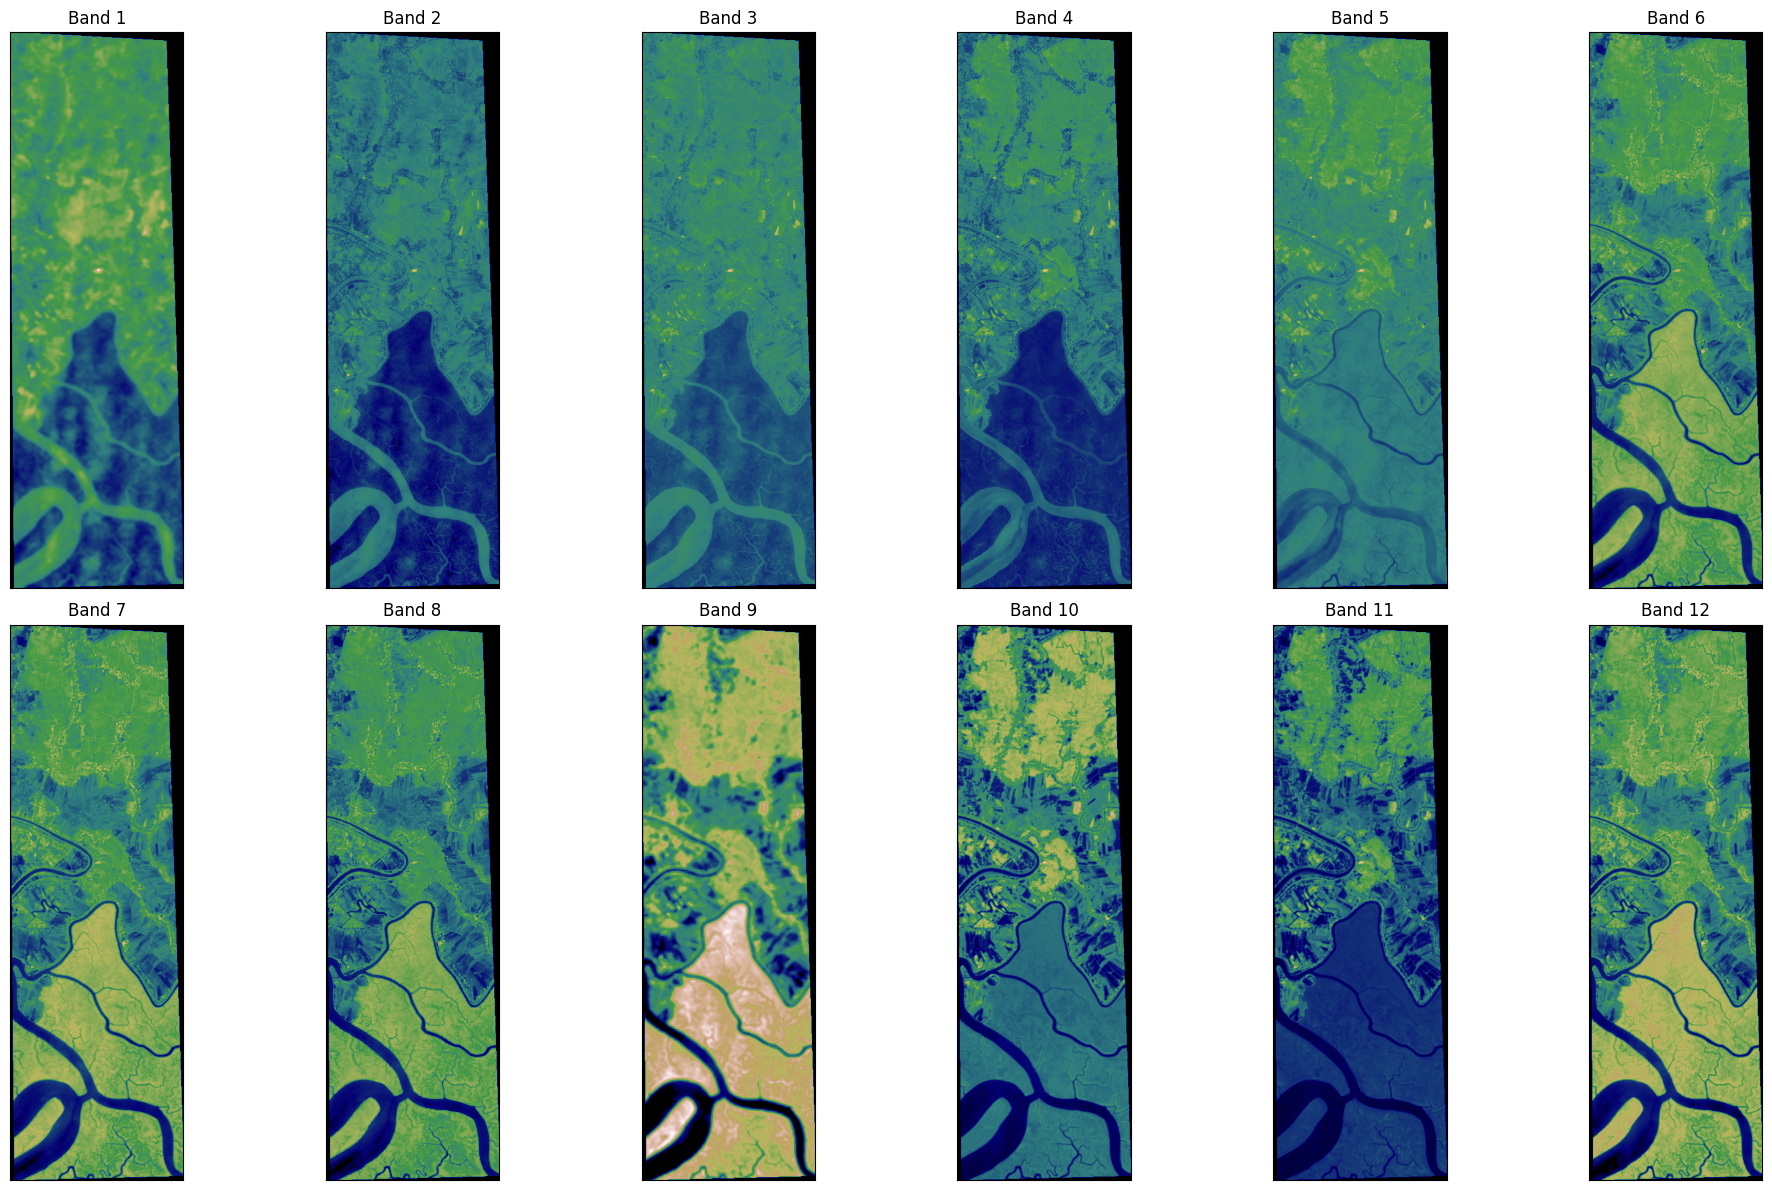

In [6]:
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

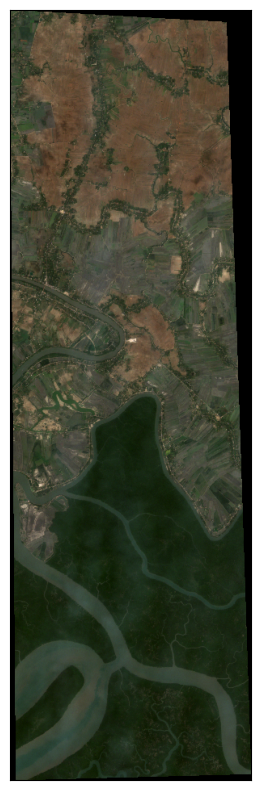

In [7]:
rgb = ep.plot_rgb(arr_st, 
                  rgb=(3,2,1), 
                  figsize=(8, 10), 
                  # title='RGB Composite Image'
                  )

plt.show()

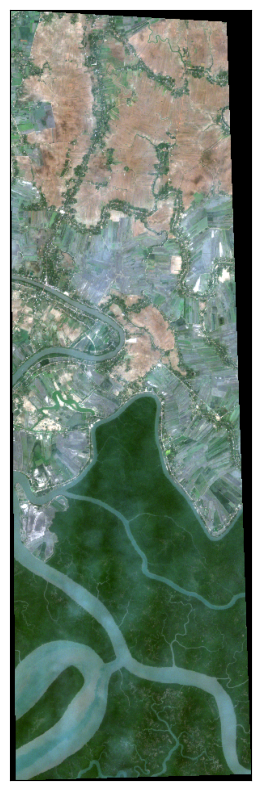

In [8]:
ep.plot_rgb(
    arr_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(8, 10),
    # title="RGB Composite Image with Stretch Applied",
)

plt.show()

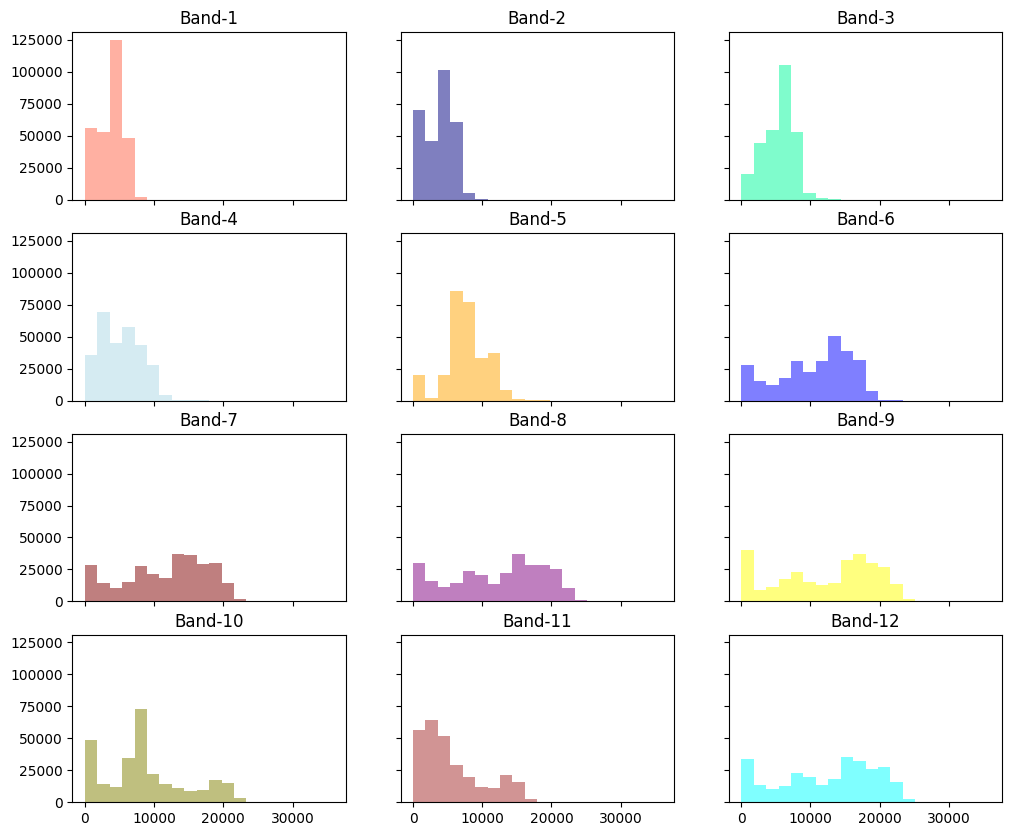

In [9]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

ep.hist(arr_st, 
         colors = colors,
        title=[f'Band-{i}' for i in range(1, 13)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10)
        )

plt.show()

In [10]:
x = np.moveaxis(arr_st, 0, -1)
x.shape
     

(954, 298, 12)

In [11]:
from sklearn.preprocessing import StandardScaler

X_data = x.reshape(-1, 12)

scaler = StandardScaler().fit(X_data)

X_scaled = scaler.transform(X_data)

X_scaled.shape
     

(284292, 12)

In [12]:
y_data = loadmat('Sundarbands_gt.mat')['gt']
y_data.shape

(954, 298)

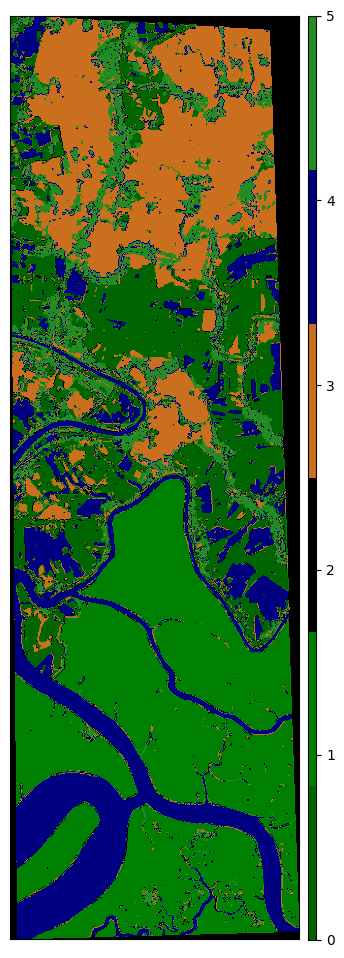

In [13]:
ep.plot_bands(y_data, cmap=ListedColormap(['darkgreen', 'green', 'black', '#CA6F1E', 'navy', 'forestgreen']))
plt.show()

In [1]:
from glob import glob
import numpy as np
from scipy.io import loadmat
import rasterio as rio
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from scipy.io import loadmat
from sklearn.metrics import classification_report, accuracy_score

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')
     

S_sentinel_bands = glob("sundarbans_data/*B?*.tiff")
S_sentinel_bands.sort()

l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

# Data
arr_st = np.stack(l)

# Ground Truth
y_data = loadmat('Sundarbands_gt.mat')['gt']

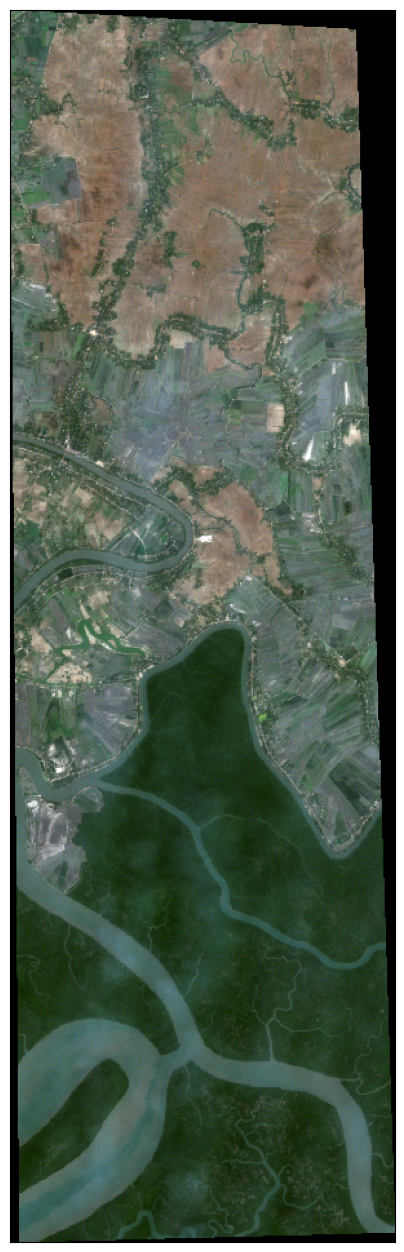

In [2]:
ep.plot_rgb(
    arr_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.02,
    figsize=(12, 16),
    # title="RGB Composite Image with Stretch Applied",
)

plt.show()

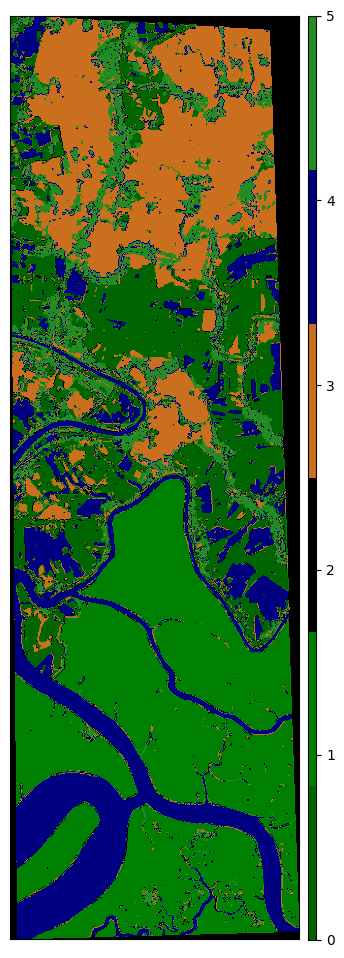

In [3]:
# Visualize Groundtruth

ep.plot_bands(y_data, 
              cmap=ListedColormap(['darkgreen', 'green', 'black', 
                                   '#CA6F1E', 'navy', 'forestgreen']))
plt.show()

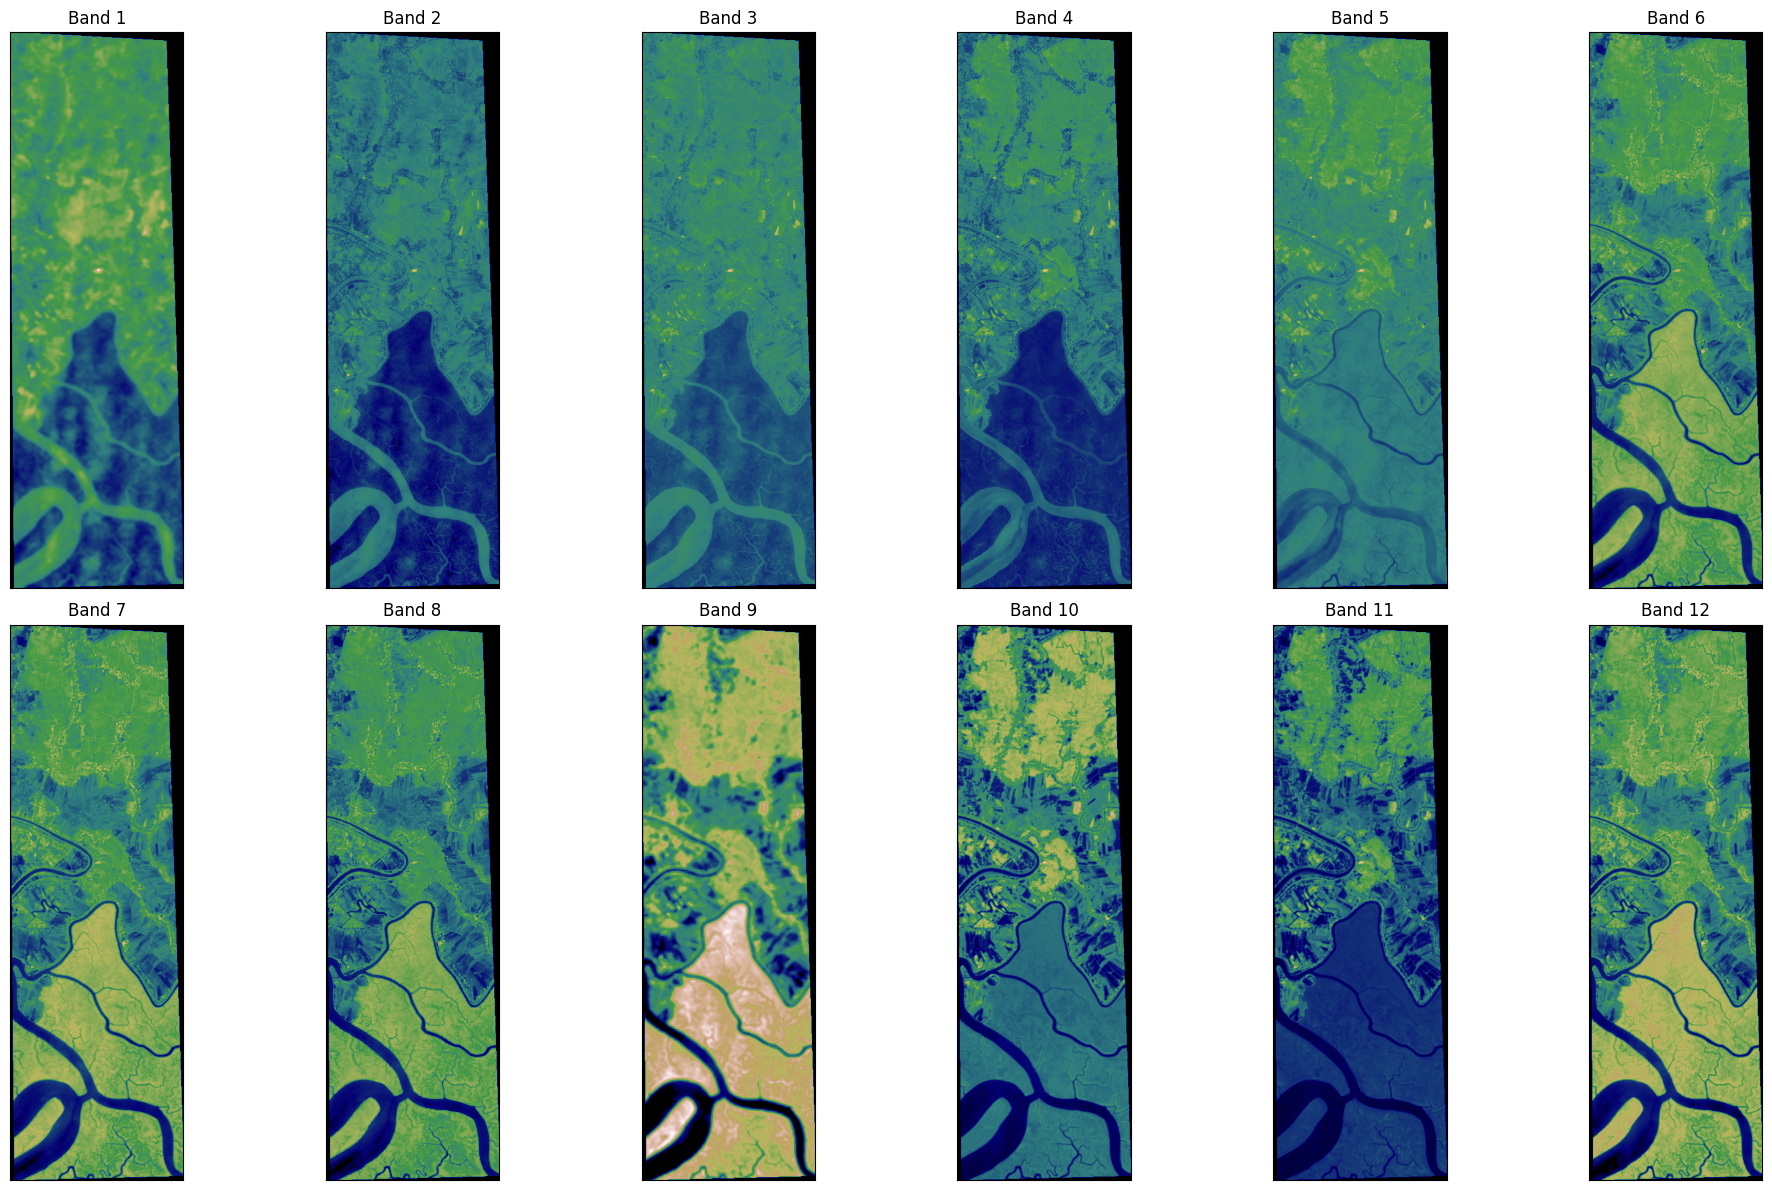

In [4]:
ep.plot_bands(arr_st, 
              cmap = 'gist_earth', 
              figsize = (20, 12), 
              cols = 6, 
              cbar = False)
plt.show()

In [5]:
import pca
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
def applyPCA(X, numComponents=75):
    newX = np.reshape(X, (-1, X.shape[2]))
    pca = PCA(n_components=numComponents, whiten=True)
    newX = pca.fit_transform(newX)
    newX = np.reshape(newX, (X.shape[0],X.shape[1], numComponents))
    return newX, pca
def padWithZeros(X, margin=2):
    newX = np.zeros((X.shape[0] + 2 * margin, X.shape[1] + 2* margin, X.shape[2]))
    x_offset = margin
    y_offset = margin
    newX[x_offset:X.shape[0] + x_offset, y_offset:X.shape[1] + y_offset, :] = X
    return newX
def createImageCubes(X, y, windowSize=5, removeZeroLabels = False):
    margin = int((windowSize - 1) / 2)
    zeroPaddedX = padWithZeros(X, margin=margin)
    # split patches
    patchesData = np.zeros((X.shape[0] * X.shape[1], windowSize, windowSize, X.shape[2]))
    patchesLabels = np.zeros((X.shape[0] * X.shape[1]))
    patchIndex = 0
    for r in range(margin, zeroPaddedX.shape[0] - margin):
        for c in range(margin, zeroPaddedX.shape[1] - margin):
            patch = zeroPaddedX[r - margin:r + margin + 1, c - margin:c + margin + 1]   
            patchesData[patchIndex, :, :, :] = patch
            patchesLabels[patchIndex] = y[r-margin, c-margin]
            patchIndex = patchIndex + 1
    if removeZeroLabels:
        patchesData = patchesData[patchesLabels>0,:,:,:]
        patchesLabels = patchesLabels[patchesLabels>0]
        patchesLabels -= 1
    return patchesData, patchesLabels
def splitTrainTestSet(X, y, testRatio, randomState=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testRatio, random_state=randomState, stratify=y)
    return X_train, X_test, y_train, y_test
## GLOBAL VARIABLES
dataset = 'SB'
test_size = 0.30
windowSize = 15
MODEL_NAME = 'Sundarbans'
path = '/content/drive/MyDrive/Sundarbans/'

X_data = np.moveaxis(arr_st, 0, -1)
y_data = loadmat('Sundarbands_gt.mat')['gt']

# Apply PCA
K = 5
X,pca = applyPCA(X_data,numComponents=K)

print(f'Data After PCA: {X.shape}')

# Create 3D Patches
X, y = createImageCubes(X, y_data, windowSize=windowSize)
print(f'Patch size: {X.shape}')

# Split train and test
X_train, X_test, y_train, y_test = splitTrainTestSet(X, y, testRatio = test_size)
# X_train=X_train[0:198976]
# y_train=y_train[0:198976]
# X_test=X_test[0:85280]
# y_test=y_test[0:85288]
X_train=X_train[0:100000]
y_train=y_train[0:100000]
X_test=X_test[0:60000]
y_test=y_test[0:60000]
X_train = X_train.reshape(-1, windowSize, windowSize, K, 1)
X_test = X_test.reshape(-1, windowSize, windowSize, K, 1)

# One Hot Encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f'Train: {X_train.shape}\nTest: {X_test.shape}\nTrain Labels: {y_train.shape}\nTest Labels: {y_test.shape}')


Data After PCA: (954, 298, 5)
Patch size: (284292, 15, 15, 5)
Train: (100000, 15, 15, 5, 1)
Test: (60000, 15, 15, 5, 1)
Train Labels: (100000, 6)
Test Labels: (60000, 6)


In [ ]:
import torch
from dropblock import DropBlock3D

# (bsize, n_feats, depth, height, width)
# x = torch.rand(100, 10, 16, 16, 16)

drop_block3d = DropBlock3D(block_size=2, drop_prob=0.2)


In [ ]:
import torch
from dropblock import DropBlock2D

# (bsize, n_feats, height, width)
# x = torch.rand(100, 10, 16, 16)

drop_block2d = DropBlock2D(block_size=3, drop_prob=0.1)


In [ ]:
#latest edited
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
S=15
L=5
# Define the model
class CNN3D(nn.Module):
    def __init__(self, output_units):
        super(CNN3D, self).__init__()

        # 3D convolutional layers
        self.conv3d_1 = nn.Conv3d(in_channels=1, out_channels=16, kernel_size=(2, 2, 3))
        # self.drop_block = DropBlock3D(block_size=2, drop_prob=0.3)
        self.conv3d_2 = nn.Conv3d(in_channels=16, out_channels=32, kernel_size=(2, 2, 3))
        
        # Calculate the resulting depth dimension after 3D convolutions
        self.conv3d_2_out_depth = L - 4  # 5 - (3 - 1 + 3 - 1)
        
        # 2D convolutional layer
        self.conv2d = nn.Conv2d(in_channels=96, out_channels=64, kernel_size=(2, 2))
        
        # Calculate the resulting height and width after the 2D convolution
        self.conv2d_out_height = S - 2  # 15 - 2 (kernel_size=2, stride=1, padding=0)
        self.conv2d_out_width = S - 2   # 15 - 2 (kernel_size=2, stride=1, padding=0)
        
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 12 * 10, 128)
        self.dropout1 = nn.Dropout(0.4)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.4)
        self.fc3 = nn.Linear(64, 20)
        self.dropout3 = nn.Dropout(0.4)
        self.output = nn.Linear(20, output_units)

    def forward(self, x):
        x = x.permute(0, 4, 3, 1, 2)  # Change to [batch_size, in_channels, depth, height, width]
        print(f'Input layer: {x.shape}')
        
        x = F.relu(self.conv3d_1(x))
        # print(f'After conv3d_1: {x.shape}')  # [batch_size, 16, 4, 14, 13]
        x=drop_block3d(x)
        
        x = F.relu(self.conv3d_2(x))
        # print(f'After conv3d_2: {x.shape}')  # [batch_size, 32, 1, 13, 12]
        x=drop_block3d(x)
        x = x.view(32,32*3,13,11)  # Remove the depth dimension which should be 1 after the second Conv3D
        # print(f'After reshape: {x.shape}')  # [batch_size, 32, 13, 12]
        # x=drop_block2d(x)
        x = F.relu(self.conv2d(x))
        # print(f'After conv2d: {x.shape}')  # [batch_size, 64, 12, 11]
        
        x = x.view(x.size(0), -1)  # Flatten
        # print(f'After flatten: {x.shape}')  # [batch_size, 64 * 12 * 11]
        
        x = F.relu(self.fc1(x))
        # print(f'After fc1: {x.shape}')  # [batch_size, 128]
        
        # x = self.dropout1(x)
        # print(f'After dropout1: {x.shape}')  # [batch_size, 128]
        
        x = F.relu(self.fc2(x))
        # print(f'After fc2: {x.shape}')  # [batch_size, 64]
        
        # x = self.dropout2(x)
        # print(f'After dropout2: {x.shape}')  # [batch_size, 64]
        
        x = F.relu(self.fc3(x))
        # print(f'After fc3: {x.shape}')  # [batch_size, 20]
        
        # x = self.dropout3(x)
        # print(f'After dropout3: {x.shape}')  # [batch_size, 20]
        
        x = self.output(x)
        # print(f'Output layer: {x.shape}')  # [batch_size, output_units]
        
        return x

# Initialize model, loss function, and optimizer
output_units = y_train.shape[1]
model = CNN3D(output_units)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device='cpu'
model.to(device)

# Training loop


In [ ]:
num_epochs = 1
for epoch in range(num_epochs):
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
        # if i == 6217:
        #     print("ab na ho payega bhai")
        #     break

# Save the trained model
torch.save(model.state_dict(), '3d_cnn_model.pth')


In [33]:
# X_test=X_test[0:85288]
# y_test=y_test[0:85288]
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(train_dataset, batch_size=32)


In [34]:
# Put the model in evaluation mode
model.eval()

# Initialize variables to track accuracy and total number of samples
total_correct = 0
total_samples = 0

with torch.no_grad():  # Disable gradient calculation for evaluation
    for j, (inputs, labels) in enumerate(test_loader):  # Assuming you have a DataLoader named test_loader
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        labels = torch.argmax(labels, 1)  # Convert one-hot encoded labels to class indices
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)
        # if (j + 1) % 6200 == 0:
        #     break

accuracy = (total_correct / total_samples) * 100
print(f'Accuracy of the model: {accuracy:.2f}%')


Accuracy of the model: 93.92%


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
S=15
L=5
# Define the model
class CNN3D(nn.Module):
    def __init__(self, output_units):
        super(CNN3D, self).__init__()
        
        # 3D convolutional layers
        self.conv3d_1 = nn.Conv3d(in_channels=1, out_channels=16, kernel_size=(2, 2, 3),stride=1)
        self.conv3d_2 = nn.Conv3d(in_channels=16, out_channels=32, kernel_size=(2, 2, 3),stride=1)
        
        self.conv3d_2_out_depth = L - 4
        
        # 2D convolutional layer
        self.conv2d = nn.Conv2d(in_channels=32 * self.conv3d_2_out_depth, out_channels=64, kernel_size=(2, 2))
        
        # Calculate the resulting height and width after the 2D convolution
        self.conv2d_out_height = S - 3  # 15 - (1+1+1)
        self.conv2d_out_width = S - 3  # 15 - (1+1+1)
        
        # Fully connected layers
        self.fc1 = nn.Linear(64 * self.conv2d_out_height * self.conv2d_out_width, 128)
        self.dropout1 = nn.Dropout(0.4)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.4)
        self.fc3 = nn.Linear(64, 20)
        self.dropout3 = nn.Dropout(0.4)
        self.output = nn.Linear(20, output_units)

    def forward(self, x):
        x = x.permute(0, 4, 3, 1, 2)
        x = F.relu(self.conv3d_1(x))
        x = F.relu(self.conv3d_2(x))
        x = x.view(x.size(0), -1, x.size(3), x.size(4)) # Reshape to fit into 2D conv layer
        x = F.relu(self.conv2d(x))
        x = x.view(x.size(0), -1) # Flatten
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.dropout3(x)
        x = F.softmax(self.output(x), dim=1)
        return x

# Initialize model, loss function, and optimizer
output_units = y_train.shape[1]
model = CNN3D(output_units)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Save the trained model
torch.save(model.state_dict(), '3d_cnn_model.pth')


RuntimeError: Given groups=1, weight of size [64, 32, 2, 2], expected input[32, 96, 13, 11] to have 32 channels, but got 96 channels instead

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Define the model
class CNN3D(nn.Module):
    def __init__(self, output_units):
        super(CNN3D, self).__init__()
        
        # 3D convolutional layers
        self.conv3d_1 = nn.Conv3d(in_channels=1, out_channels=16, kernel_size=(2, 2, 2),padding=0,stride=1),
        self.conv3d_2 = nn.Conv3d(in_channels=16, out_channels=32, kernel_size=(2, 2, 2),padding=0,stride=1)
        
        # Flattening the 3D conv layer to 2D conv layer
        self.reshape = lambda x: x.view(x.size(0), -1, x.size(2), x.size(3) * x.size(4))
        
        # 2D convolutional layer
        self.conv2d = nn.Conv2d(in_channels=32 * (S - 3) * (S - 3), out_channels=64, kernel_size=(2, 2))
        
        # Fully connected layers
        self.fc1 = nn.Linear(64 * (S - 4) * (S - 4), 128)
        self.dropout1 = nn.Dropout(0.4)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.4)
        self.fc3 = nn.Linear(64, 20)
        self.dropout3 = nn.Dropout(0.4)
        self.output = nn.Linear(20, output_units)

    def forward(self, x):
        x = x.permute(0, 4, 3, 1, 2)
        x = F.relu(self.conv3d_1(x))
        x = F.relu(self.conv3d_2(x))
        
        x = self.reshape(x)
        x = F.relu(self.conv2d(x))
        
        x = x.view(x.size(0), -1) # Flatten
        
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.dropout3(x)
        x = F.softmax(self.output(x), dim=1)
        
        return x




#my part
# class CNN_classification_model (nn.Module):
#     def __init__(self):
#         super(CNN_classification_model, self).__init__()
#         self.model= nn.Sequential(
        
#         #Conv layer 1    
#         nn.Conv3d(1, 16, kernel_size=(2, 2, 3), padding=0),
#         nn.ReLU(),
#         nn.Conv3d(16, 32, kernel_size=(2, 2, 3), padding=0),
#         nn.ReLU(),
#         # nn.MaxPool3d((2, 2, 2)),  
#         # DropBlock3D(block_size=7, drop_prob=0.1),
#         self.reshape = lambda x: x.view(x.size(0), -1, x.size(2), x.size(3) * x.size(4))
        
# #       # 2D convolutional layer
#         self.conv2d = nn.Conv2d(in_channels=32 * (S - 3) * (S - 3), out_channels=64, kernel_size=(2, 2), activation='relu')
        
#         #Conv layer 2  
#         # nn.Conv3d(32, 64, kernel_size=(3, 3, 3), padding=0),
#         # nn.ReLU(),
#         # nn.MaxPool3d((2, 2, 2)),
#         # DropBlock3D(block_size=12, drop_prob=0.3),
#         #Flatten
#         nn.Flatten(),
#         nn.Linear(64 * (S - 4) * (S - 4), 128),
#         nn.Dropout(0.4),
#         nn.Linear(128, 64),
#         nn.Dropout(0.4),
#         nn.Linear(64, 20),
#         nn.Dropout(0.4),
#         nn.Linear(20, output_units),
          
#         # #Linear 1
#         # nn.Linear(2**3*64, 128), 
#         # #Relu
#         # nn.ReLU(),
#         # #BatchNorm1d
#         # nn.BatchNorm1d(128),
#         # #Dropout
#         # nn.Dropout(p=0.15),
#         # #Linear 2
#         # nn.Linear(128, num_classes)
#         )
    

#     def forward(self, x):
#         # Set 1
#         out = self.model(x)
#         return out
# model = CNN_classification_model()
#  #You can use the GPU by typing: model.cuda()
# print(model)
# Initialize model, loss function, and optimizer
output_units = y_train.shape[1]
model = CNN3D(output_units)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
X_train=torch.as_tensor(X_train)
X_test=torch.as_tensor(X_test)
y_train=torch.as_tensor(y_train)
y_test=torch.as_tensor(y_test)
train = torch.utils.data.TensorDataset(X_train.float(),y_train.long())
test = torch.utils.data.TensorDataset(X_test.float(),y_test.long())
 # data loader with pytorch
train_loader = torch.utils.data.DataLoader(train, batch_size = 256, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = 256, shuffle = False)
# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Assuming `model` and `optimizer` are already defined
model = model.to(device)
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Save the trained model
torch.save(model.state_dict(), '3d_cnn_model.pth')


TypeError: 'tuple' object is not callable

In [15]:
from keras.models import Model
from keras.layers import Input, Conv3D, Reshape, Conv2D, Flatten, Dense, Dropout

S = windowSize
L = K
output_units = y_train.shape[1]

## input layer
input_layer = Input((S, S, L, 1))

## convolutional layers
conv_layer1 = Conv3D(filters=16, kernel_size=(2, 2, 3), activation='relu')(input_layer)
conv_layer2 = Conv3D(filters=32, kernel_size=(2, 2, 3), activation='relu')(conv_layer1)
conv2d_shape = conv_layer2.shape
conv_layer3 = Reshape((conv2d_shape[1], conv2d_shape[2], conv2d_shape[3]*conv2d_shape[4]))(conv_layer2)
conv_layer4 = Conv2D(filters=64, kernel_size=(2,2), activation='relu')(conv_layer3)

flatten_layer = Flatten()(conv_layer4)

## fully connected layers
dense_layer1 = Dense(128, activation='relu')(flatten_layer)
dense_layer1 = Dropout(0.4)(dense_layer1)
dense_layer2 = Dense(64, activation='relu')(dense_layer1)
dense_layer2 = Dropout(0.4)(dense_layer2)
dense_layer3 = Dense(20, activation='relu')(dense_layer2)
dense_layer3 = Dropout(0.4)(dense_layer3)
output_layer = Dense(units=output_units, activation='softmax')(dense_layer3)
# define the model with input layer and output layer
model = Model(name = dataset+'_Model' , inputs=input_layer, outputs=output_layer)

model.summary()

Model: "SB_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15, 15, 5, 1)]    0         
                                                                 
 conv3d (Conv3D)             (None, 14, 14, 3, 16)     208       
                                                                 
 conv3d_1 (Conv3D)           (None, 13, 13, 1, 32)     6176      
                                                                 
 reshape (Reshape)           (None, 13, 13, 32)        0         
                                                                 
 conv2d (Conv2D)             (None, 12, 12, 64)        8256      
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               117

In [20]:
# Compile
from keras.models import Model
from keras.layers import Input, Conv3D, Reshape, Conv2D, Flatten, Dense, Dropout
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from datetime import datetime
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Callbacks
logdir = path+"logs/" +model.name+'_'+datetime.now().strftime("%d_%m_%Y-%H_%M_%S")

tensorboard_callback = TensorBoard(log_dir=logdir)

es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0,
                   patience = 1,
                   verbose = 1,
                   restore_best_weights = True)

checkpoint = ModelCheckpoint(filepath = 'Pavia_University_Model.h5', 
                             monitor = 'val_loss', 
                             mode ='min', 
                             save_best_only = True,
                             verbose = 1)
# Fit
history = model.fit(x=X_train, y=y_train, 
                    batch_size=256, epochs=6, 
                    validation_data=(X_test, y_test), callbacks = [tensorboard_callback, es, checkpoint])


Epoch 1/6
778/778 [==============================] - ETA: 0s - loss: 0.3728 - accuracy: 0.8706
Epoch 1: val_loss improved from inf to 0.12754, saving model to Pavia_University_Model.h5
778/778 [==============================] - 115s 123ms/step - loss: 0.3728 - accuracy: 0.8706 - val_loss: 0.1275 - val_accuracy: 0.9506
Epoch 2/6
777/778 [============================>.] - ETA: 0s - loss: 0.1822 - accuracy: 0.9397
Epoch 2: val_loss improved from 0.12754 to 0.10894, saving model to Pavia_University_Model.h5
778/778 [==============================] - 92s 119ms/step - loss: 0.1823 - accuracy: 0.9397 - val_loss: 0.1089 - val_accuracy: 0.9583
Epoch 3/6
777/778 [============================>.] - ETA: 0s - loss: 0.1374 - accuracy: 0.9536
Epoch 3: val_loss improved from 0.10894 to 0.08300, saving model to Pavia_University_Model.h5
778/778 [==============================] - 93s 119ms/step - loss: 0.1374 - accuracy: 0.9536 - val_loss: 0.0830 - val_accuracy: 0.9685
Epoch 4/6
777/778 [===============

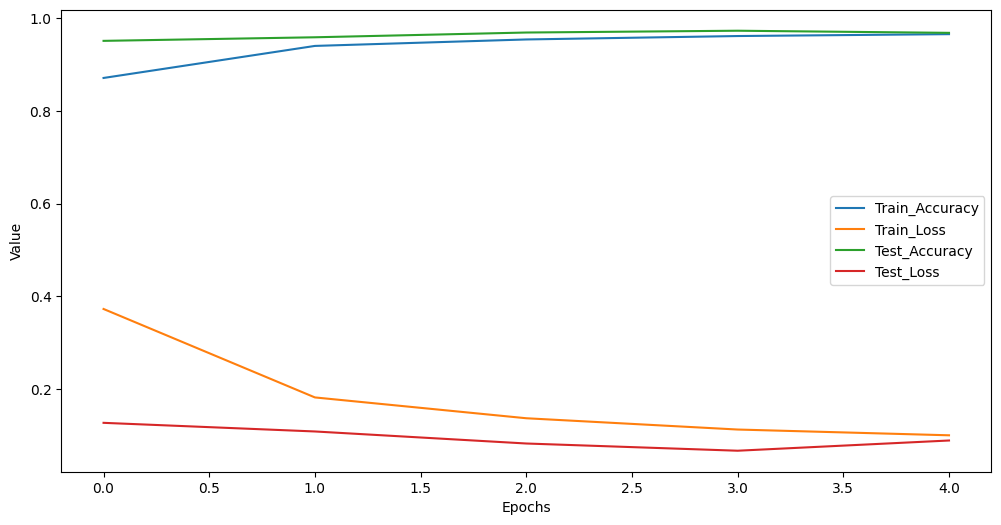

In [21]:
import pandas as pd
history = pd.DataFrame(history.history)

plt.figure(figsize = (12, 6))
plt.plot(range(len(history['accuracy'].values.tolist())), history['accuracy'].values.tolist(), label = 'Train_Accuracy')
plt.plot(range(len(history['loss'].values.tolist())), history['loss'].values.tolist(), label = 'Train_Loss')
plt.plot(range(len(history['val_accuracy'].values.tolist())), history['val_accuracy'].values.tolist(), label = 'Test_Accuracy')
plt.plot(range(len(history['val_loss'].values.tolist())), history['val_loss'].values.tolist(), label = 'Test_Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

In [44]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [47]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


Physical devices cannot be modified after being initialized
